# **1. Introducción y Objetivos del Análisis Bibliométrico**

## **Objetivo General:**
- Realizar un análisis bibliométrico exhaustivo de los artículos recopilados en tu base de datos, enfocándonos en identificar patrones de publicación, autores influyentes, colaboraciones institucionales y tendencias temáticas en el campo de estudio.

## **Objetivos Específicos:**

- Determinar la frecuencia y distribución de autores y coautores.

- Analizar la evolución temporal de las publicaciones.

- Identificar las revistas más relevantes y su impacto.

- Examinar las palabras clave más frecuentes y su coocurrencia.

- Visualizar redes de colaboración entre autores e instituciones.

# **2. Carga y Preparación de los Datos**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import re
import seaborn as sns
from google.colab import drive

In [40]:
df = pd.read_csv("/content/Analisis Documentos Tesis BD.csv")
df.head()

,Article title,Year,Author(s),No. Author(s),Type of institution,Name of the institution(s),No. institution(s),Study area,No. Study area,Country of study,...,Keywords,Article approach,Methodology,Type,Orientation,Theory,Determinants,Barriers,Characteristic of sustainable value creation,CSV Related to other concepts and theories
0,The importance of performance measurement and ...,2024,"Sohns, T. M., Aysolmaz, B., Figge, L., Joshi, A.",2,University,"LUT University, Tampere University",2,NaN,2.0,Finland,...,"Performance management, Supply chain managemen...",Quantitative,Structural equation modelling (SEM),Survey,Predictive,organizational control,"Governance, stakeholders, customers and suppliers",limited resources,"Sustainability performance, s Performance mana...",Supply chain
1,"Understanding creative enterprise creation, fu...",2024,Mohammed-Aminu Sanda; Rufai Haruna Kilu; Ana A...,3,University,University of Ghana Business School; Universit...,3,Business & Management; Entrepreneurship,2.0,Ghana,...,creative entrepreneurship; creative enterprise...,Qualitative,Descriptive & thematic analysis; sense-making,Interviews,Exploratory,Business Canvas Model,Government & investor support; regulatory poli...,Lack of governmental & investor support; high ...,Viability; innovative policy spaces; sustainab...,Institutional Theory; Business Model Canvas; s...
2,Corporate sustainability towards creating shar...,2024,Liana Rahardja,1,University,STIE Jakarta International College,1,Business & Management; Environmental Science,2.0,Indonesia,...,Five bottom line; Triple bottom line; Sustaina...,Quantitative,Panel data OLS regression; lead-lag analysis,Empirical quantitative,Predictive,Extended TBL (Five Bottom Line) & CSV theory,Financial performance; Environmental performan...,Social performance (negative effect on CSV); G...,Increased revenue; profitability; environmenta...,Reconceiving products & markets; redefining va...
3,Relationship between knowledge transfer and su...,2024,"Paredes-Chacín, A. J.; Díaz-Bejarano, S.; Marí...",4,University,Universidad Autónoma de Occidente; Universidad...,4,Business & Management; Information Systems,2.0,Colombia,...,knowledge transfer; sustainable innovation; in...,Quantitative,Questionnaire survey; Mann-Whitney U test; K-m...,Survey,Exploratory,Knowledge-based View (KBV),Knowledge production; Information technologies...,Weak interorganizational links; limited stakeh...,Sustainable innovation performance; Interorgan...,System of relations between knowledge transfer...
4,Challenges and opportunities in sustainability...,2024,"Setyaningsih, S.; Widjojo, R.; Kelle, P.",3,University,Széchenyi István University; Indonesian Intern...,3,Environmental Policy; Environmental Management...,5.0,Global,...,Sustainability reporting; small and medium-siz...,Secondary,Systematic literature review,Secondary research,Descriptive,Systematic Review Framework,Governance practices; social responsibility; e...,Financial; general attitude; knowledge & techn...,Improved understanding of SME reporting challe...,Global Reporting Initiative (GRI); ESG frameworks


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Article title                                 153 non-null    object 
 1   Year                                          153 non-null    int64  
 2   Author(s)                                     153 non-null    object 
 3   No. Author(s)                                 153 non-null    int64  
 4   Type of institution                           153 non-null    object 
 5   Name of the institution(s)                    153 non-null    object 
 6   No. institution(s)                            153 non-null    object 
 7   Study area                                    141 non-null    object 
 8   No. Study area                                142 non-null    float64
 9   Country of study                              130 non-null    obj

In [42]:
print(f'Número de muestras: {df.shape[0]}')
print(f'Número de atributos: {df.shape[1]}')
print("\nTipos de datos:")

Número de muestras: 153
Número de atributos: 29

Tipos de datos:


In [43]:
# Valores únicos
print("\n==== Valores únicos ====")
print(df.nunique())


==== Valores únicos ====
Article title                                   142
Year                                             14
Author(s)                                       149
No. Author(s)                                     8
Type of institution                              13
Name of the institution(s)                      147
No. institution(s)                                9
Study area                                      125
No. Study area                                    5
Country of study                                 59
Region                                           15
Country Development level                         6
Size of companies                                15
Journal                                          71
Journal field                                    35
FI - SJR                                         75
Quartile SJR                                      5
FI - JIF                                         55
Quartile JCR                          

In [44]:
# Revisar valores faltantes
print("\n==== VALORES FALTANTES POR COLUMNA ====")
print(df.isnull().sum())

print("\n\n==== PORCENTAJE VALORES FALTANTES POR COLUMNA ====")
porcentaje = round((df.isnull().sum() / df.isnull().count()) * 100, 2)
print(porcentaje.astype(str) + ' %')


==== VALORES FALTANTES POR COLUMNA ====
Article title                                    0
Year                                             0
Author(s)                                        0
No. Author(s)                                    0
Type of institution                              0
Name of the institution(s)                       0
No. institution(s)                               0
Study area                                      12
No. Study area                                  11
Country of study                                23
Region                                          19
Country Development level                       23
Size of companies                                7
Journal                                          0
Journal field                                    0
FI - SJR                                         4
Quartile SJR                                     4
FI - JIF                                        27
Quartile JCR                             

In [45]:
# Valores duplicados
print("\nNúmero de filas duplicadas")
print(df.duplicated(subset=None, keep='first').sum())


Número de filas duplicadas
0


In [46]:
# Estadísticas descriptivas
print("\n==== Estadísticas descriptivas ====")
df.describe()


==== Estadísticas descriptivas ====


,Year,No. Author(s),No. Study area
count,153.000000,153.000000,142.000000
mean,2022.313725,3.215686,2.169014
std,2.952409,1.617914,1.352549
min,2004.000000,1.000000,1.000000
25%,2022.000000,2.000000,1.000000
50%,2023.000000,3.000000,2.000000
75%,2024.000000,4.000000,3.000000
max,2025.000000,10.000000,5.000000


### **Observaciones del Análisis Exploratorio**

Se realizó una exploración inicial de la base de datos bibliográfica, que contiene registros detallados de artículos científicos centrados en sostenibilidad, PYMES y creación de valor compartido. Esta fase es crucial para comprender la estructura, contenido y calidad de los datos antes de proceder con análisis más profundos.

1. **Dimensiones del Conjunto de Datos:**
   - La base de datos consta de **153** registros (filas), lo cual constituye un corpus moderado y manejable para un análisis exhaustivo de posgrado.
   - Posee **29** atributos (columnas), lo que refleja una diversidad amplia de metadatos por artículo; esto permitirá cubrir múltiples dimensiones del análisis bibliométrico, desde autoría y filiación hasta indicadores de impacto y enfoque metodológico.

2. **Tipos de Datos por Atributo:**
   - Se identificaron **2** columnas de tipo numérico entero (`int64`): ‘Year’ y ‘No. Author(s)’.
   - Hay **1** columna de tipo numérico continuo (`float64`): ‘No. Study area’.
   - El resto (**26** columnas) son de tipo texto (`object`), incluyendo campos como ‘Article title’, ‘Author(s)’, ‘Journal’, ‘Keywords’ y múltiples variables de contexto (e.g. ‘Country of study’, ‘Theory’, ‘Barriers’).
   - Esta mezcla obliga a planificar por separado el tratamiento de variables cuantitativas (estadísticas descriptivas, series temporales) y cualitativas (conteo de categorías, análisis de frecuencia y redes de coocurrencia).

3. **Diversidad y Granularidad de los Datos:**
   - El conteo de valores únicos (`df.nunique()`) arroja:
     - **142** títulos únicos de artículo, lo que sugiere muy pocos duplicados en ‘Article title’.
     - **14** años de publicación distintos, con un rango que va desde 2004 hasta 2025.
     - **149** entradas diferentes en ‘Author(s)’ (antes de limpieza), lo que indica una red amplia de colaboradores.
     - **71** revistas (‘Journal’) y **35** áreas de revista (‘Journal field’), lo que refleja una dispersión considerable de los medios de publicación.
     - **153** combinaciones únicas de ‘Keywords’, evidenciando que casi cada artículo trae su propio conjunto de términos.
   - Esta alta granularidad en ‘Keywords’ y ‘Theory’ (131 valores únicos) sugiere la necesidad de agrupar o normalizar términos para análisis temático y detección de tendencias.

4. **Evaluación de Valores Faltantes:**
   - Existen columnas con más de **15 %** de valores nulos:
     - ‘Quartile JCR’ – 18.30 %
     - ‘FI – JIF’ – 17.65 %
     - ‘Country of study’ y ‘Country Development level’ – 15.03 % cada una.
   - Columnas con **entre 5 % y 12 %** de nulos:
     - ‘Region’ – 12.42 %
     - ‘Study area’ – 7.84 %
     - ‘No. Study area’ – 7.19 %
     - ‘Theory’ – 6.54 %
     - ‘Size of companies’ – 4.58 %
     - ‘Barriers’ – 3.92 %
     - ‘FI – SJR’ y ‘Quartile SJR’ – 2.61 % cada una.
   - La gestión de estos vacíos deberá ser contextualizada: p.ej., para análisis de redes de coautoría no es imprescindible ‘FI – JIF’, pero para evaluar impacto sí. Se recomienda:
     - Imputación de valores cuando corresponda (media, moda, categorías “No informado”).
     - Eliminación o exclusión de columnas con alto porcentaje de nulos si no son críticas.
     - Documentar qué registros o variables se descartan para mantener la transparencia metodológica.

5. **Identificación de Registros Duplicados:**
   - No se encontraron filas duplicadas (`df.duplicated().sum() = 0`), lo que confirma que cada entrada representa un artículo único y evita sesgos de conteo inflado.

6. **Resumen Estadístico de Atributos Numéricos:**
   - **Year** (153 valores):  
     - Rango: 2004 – 2025.  
     - Media: 2022.31 (desviación típica 2.95).  
     - Mediana: 2023; sugiere un sesgo leve hacia publicaciones recientes.
   - **No. Author(s)** (153 valores):  
     - Rango: 1 – 10 autores.  
     - Media: 3.22 (desviación típica 1.62).  
     - El 50 % de los artículos cuenta con entre 2 y 4 autores, lo que indica un nivel moderado de colaboración por artículo.
   - **No. Study area** (142 valores):  
     - Rango: 1 – 5 áreas temáticas.  
     - Media: 2.17 (desviación típica 1.35).  
     - Aproximadamente la mitad de los estudios se ubican en 1 o 2 áreas, mientras que un 25 % abarcan 3 o más, lo que denota cierto grado de interdisciplinariedad.

---
**Conclusión:**  
El corpus bibliográfico muestra una estructura heterogénea y suficientemente rica para extraer conclusiones relevantes sobre producción, colaboración e impacto. La fase exploratoria revela:
- Una producción mayoritariamente reciente (post-2020).
- Un tejido colaborativo con un número moderado de coautores.
- Una alta dispersión temática y de fuentes, que justifica análisis de agrupamiento de palabras clave y detección de comunidades de autores.

Con base en estas observaciones, la siguiente etapa de preprocesamiento deberá abordar:
1. **Normalización y agrupamiento** de variables textuales (Keywords, Theory, Journal).
2. **Imputación o exclusión** de variables con alto porcentaje de nulos.
3. **Construcción de redes** y métricas de colaboración, así como análisis temático avanzado (LDA o clustering).

# **3. Análisis Bibliométrico**

En esta sección profundizamos en el análisis bibliométrico para identificar patrones y tendencias clave en la base de datos.

### 3.1 Distribución del número de autores por artículo

La siguiente gráfica muestra cuántos artículos tienen un determinado número de autores.  
- El eje X representa el número de autores por artículo
- El eje Y muestra la cantidad de artículos en cada categoría.  
- Los números sobre cada barra indican el conteo exacto.


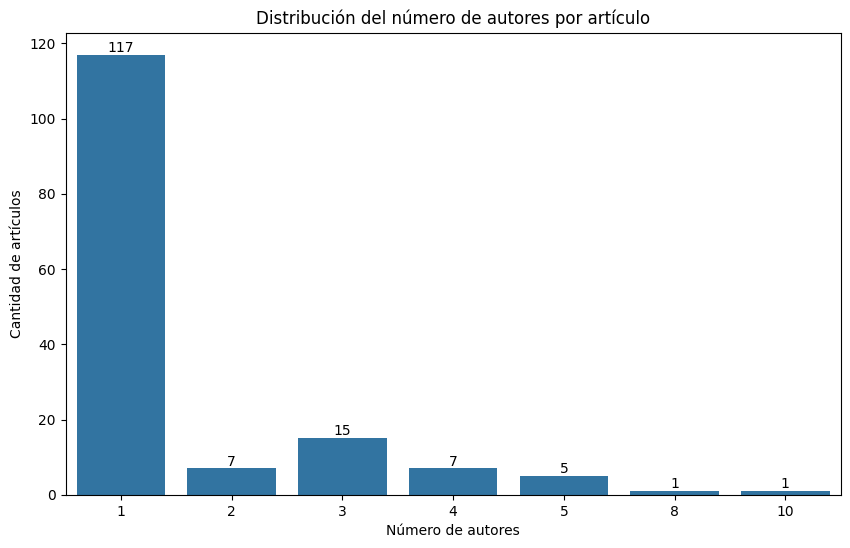

In [59]:
# 1) Calcular número de autores por artículo (usando ';' como separador)
df['Num_Authors'] = df['Author(s)'].str.split(';').str.len().fillna(0).astype(int)

# 2) Graficar
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    x='Num_Authors',
    order=sorted(df['Num_Authors'].unique())
)
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.xlabel("Número de autores")
plt.ylabel("Cantidad de artículos")
plt.title("Distribución del número de autores por artículo")
plt.show()


#### Observaciones sobre el Número de Autores por Artículo

- **Dominancia de la Autoría Individual:** Se observa una clara predominancia de artículos con un solo autor, lo que indica que la autoría individual es una modalidad frecuente en este corpus.
- **Colaboración en Equipos Pequeños:** Hay una presencia notable de artículos con 2 y 3 autores, sugiriendo colaboraciones típicas de equipos reducidos (por ejemplo, supervisor–estudiante o colegas cercanos).
- **Colaboraciones de Mayor Tamaño son Menos Frecuentes:** A medida que aumenta el número de autores, el número de publicaciones disminuye, lo que implica que los equipos grandes son la excepción.
- **Implicaciones para Redes de Coautoría:** Esta distribución anticipa una red de colaboración dispersa, con muchos autores aislados o en pequeños clústeres, más que grandes agrupaciones densas.

En conclusión, aunque la colaboración existe, la autoría individual domina este conjunto de datos. Comprender esta distribución es esencial para el posterior análisis de redes de coautoría y métricas de centralidad.


## **3.2 Análisis de Autores y Colaboración**

En este subapartado profundizamos en la identificación de los autores más prolíficos y exploramos la estructura de colaboración implícita en las coautorías.

### **Frecuencia de Autores**
Detectar qué autores aparecen con mayor frecuencia en el corpus.

### **Patrón de Coautorías**
Observar si existen grupos establecidos de colaboración (autores que publican siempre juntos).

In [64]:
# Dividir autores usando ';' o ' and ' como separadores, preservando comas internas

# 1) Definimos función de separación de autores
def split_authors(field):
    # Usamos ';' y ' and ' como delimitadores, conservando comas internas
    parts = re.split(r';| and ', str(field))
    return [p.strip() for p in parts if p.strip()]

# 2) Aplicamos la función y 'explotamos' la lista para un conteo por autor
df['authorListRaw'] = df['Author(s)'].apply(split_authors)
all_authors_raw = df['authorListRaw'].explode()

# 3) Contamos frecuencias
author_counts_raw = all_authors_raw.value_counts().reset_index()
author_counts_raw.columns = ['Autor', 'Frecuencia']

top_authors = author_counts_raw
print(top_authors)

                                                 Autor  Frecuencia
0     Sohns, T. M., Aysolmaz, B., Figge, L., Joshi, A.           2
1                                              Luo, X.           2
2                                             Chen, S.           2
3                                             Chen, L.           2
4                                             Zhou, Y.           2
..                                                 ...         ...
232                 Tritto, N., Dias, J. G., Bassi, F.           1
233                             Yang, W., Hwang, Y.-S.           1
234                              Yoshida, S., Yagi, H.           1
235                               Yucel, M., Yucel, S.           1
236  Zvarikova, K., Dvorsky, J., Belas, J. J., Metz...           1

[237 rows x 2 columns]


In [67]:
# 4) Extraemos el Top 10
print("==== Top 10 Autores por Frecuencia (Raw) ====")
top10_authors = author_counts_raw.head(10)
print(top10_authors)

==== Top 10 Autores por Frecuencia (Raw) ====
                                              Autor  Frecuencia
0  Sohns, T. M., Aysolmaz, B., Figge, L., Joshi, A.           2
1                                           Luo, X.           2
2                                          Chen, S.           2
3                                          Chen, L.           2
4                                          Zhou, Y.           2
5                                     Lestari, E.D.           2
6                                       Tannady, H.           2
7                                    Kurniasari, F.           2
8                                           Cao, Y.           2
9                        Khurshid, H., Snell, R. S.           2


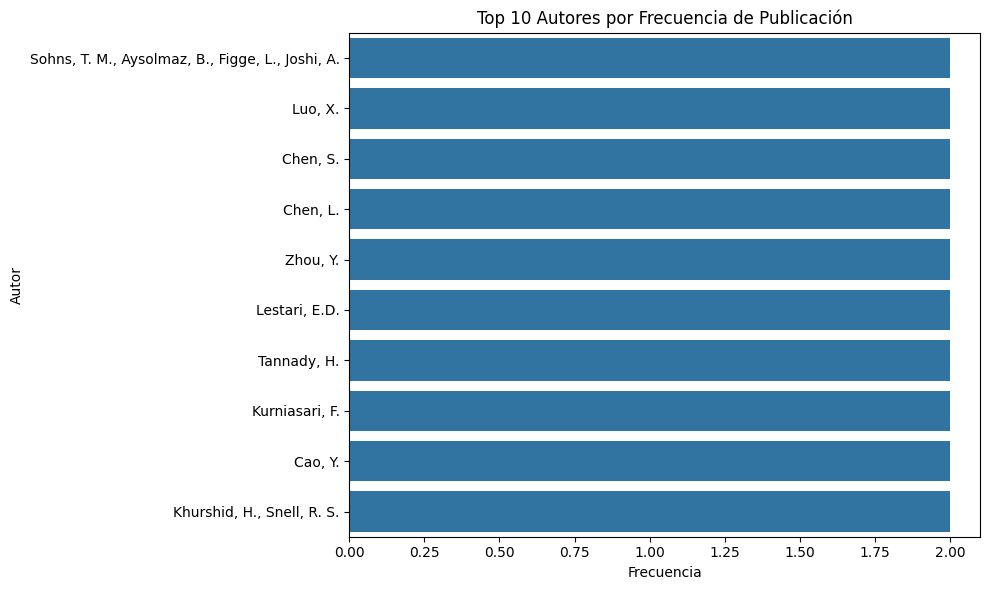

In [69]:
# 5) Graficamos
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_authors, x='Frecuencia', y='Autor')
plt.title('Top 10 Autores por Frecuencia de Publicación')
plt.xlabel('Frecuencia')
plt.ylabel('Autor')
plt.tight_layout()
plt.show()

### Interpretación del Top 10 de Autores

La gráfica anterior muestra los 10 autores con mayor número de apariciones en el conjunto de datos:

- **Coautorías múltiples**: El registro **“Sohns, T. M., Aysolmaz, B., Figge, L., Joshi, A.”** aparece en dos publicaciones, lo cual nos indica que este grupo de cuatro investigadores colabora de forma estable en al menos dos trabajos.
- **Investigadores individuales destacados**: Autores como **Luo, X.**, **Chen, S.**, **Chen, L.** o **Zhou, Y.** también presentan dos publicaciones cada uno, mostrando una contribución sólida y continua.
- **Distribución homogénea**: Ningún autor supera las dos publicaciones, lo que sugiere que no existe un “autor estrella” con alta predominancia sino varios investigadores con producción modesta pero consistente.


## **3.3 Análisis Temporal de Publicaciones**

En este subapartado examinamos la evolución del número de publicaciones a lo largo del tiempo. Analizar la tendencia anual de publicación es clave para:

- Identificar picos de mayor actividad investigativa.  
- Detectar períodos de interés emergente o consolidado en sostenibilidad, PYMES y creación de valor compartido.  
- Evaluar la madurez del campo: si la producción crece exponencialmente, se estabiliza o decae.


### **Frecuencia de Publicaciones por Año**

A continuación visualizamos el número de artículos publicados cada año. Las anotaciones sobre cada barra indican el conteo exacto de publicaciones.


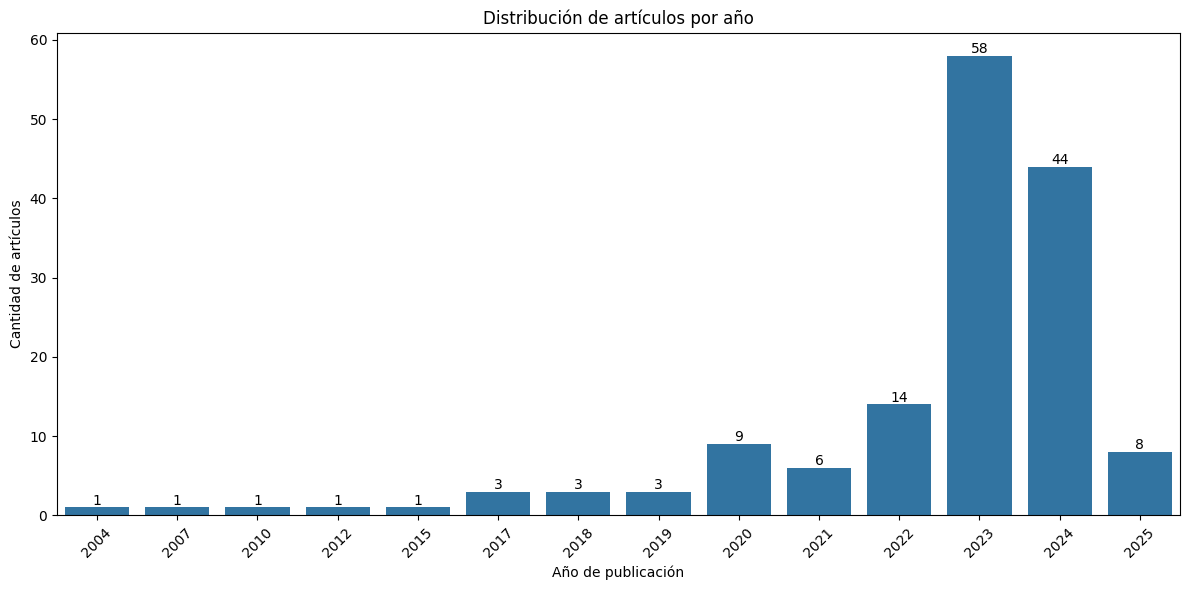

In [79]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df,
    x="Year",
    order=sorted(df["Year"].unique())
)
# Añadir etiqueta de valor sobre cada barra
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.xlabel("Año de publicación")
plt.ylabel("Cantidad de artículos")
plt.title("Distribución de artículos por año")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El gráfico revela una dinámica en tres fases bien diferenciadas:

1. **Fase Formativa (2004–2019):**  
   - Durante estos quince años, la producción permanece baja y relativamente constante, con 1–3 artículos anuales.  
   - Esta etapa refleja un interés aún incipiente en el tema de sostenibilidad y creación de valor compartido en PYMES, posiblemente concentrado en núcleos académicos aislados.

2. **Fase de Consolidación (2020–2022):**  
   - A partir de 2020, se aprecia un punto de inflexión: 9 artículos en 2020 frente a sólo 3 en 2019, un incremento de +200 %.  
   - En 2021 la cifra sube a 6 (+33 % respecto a 2020) y en 2022 a 14 (+133 %), mostrando un crecimiento sostenido y la formación de una comunidad de investigación más cohesionada.  
   - Este aumento coincide con la atención global a la resiliencia de las PYMES durante la pandemia, lo que pudo impulsar estudios sobre prácticas sostenibles.

3. **Fase de Auge Emergente (2023–2025):**  
   - 2023 registra 58 publicaciones (+314 % respecto a 2022), y 2024 alcanza 44 artículos (aunque con un ligero retroceso de –24 %, sigue muy por encima de años previos).  
   - La **tasa de crecimiento anual compuesta (CAGR)** entre 2020 (9) y 2024 (44) es aproximadamente:
     \[
       \text{CAGR} = \left(\frac{44}{9}\right)^{\frac{1}{4}} - 1 \approx 44\%
     \]
     indicando un fuerte impulso sostenido.  
   - El ligero descenso de 2024 frente a 2023 podría reflejar un desfase en la indexación de artículos o un ajuste tras el pico puntual de 2023 (por ejemplo, proyectos financiados con fecha límite en 2022).  

**Patrones y factores potenciales:**

- **Eventos de la agenda global:** Crisis climáticas, reformas legislativas sobre sostenibilidad y programas de financiación a PYMES habrían estimulado un gran número de estudios entre 2021 y 2023.  
- **Iniciativas académicas:** Congresos y especializaciones en desarrollo sostenible y valor compartido parecen haber generado un “efecto llamada” que aumenta la visibilidad y publicación en el campo.  
- **Lag en indexación:** Para 2025 sólo hay 8 registros a la fecha actual; es probable que a medida que se indexen más artículos el total de 2025 aumente, alineándose con la tendencia de crecimiento.

**Implicaciones para el análisis bibliométrico:**

- Este boom emergente sugiere que las métricas de impacto (FI y quartiles) pueden haberse visto afectadas: las revistas de alto factor probablemente concentren muchas de estas publicaciones recientes.  
- Sería oportuno realizar un **análisis correlacional** entre año de publicación y quartil (JCR/SJR) para verificar si la calidad percibida crece a la par con el volumen.  
- La combinación de este crecimiento con las redes de coautoría permitirá detectar “motores” de la disciplina: autores o grupos que concentran tanto la productividad como el impacto en los últimos años.


## **3.4 Análisis de Revistas y Temáticas**

Este subapartado se enfoca en las revistas donde se publican los artículos y las palabras clave que representan los temas de investigación.

### **3.4.1 Revistas más Relevantes**

Identificar las revistas con el mayor número de publicaciones nos muestra los principales canales de difusión y posible concentración de la audiencia académica en este campo.


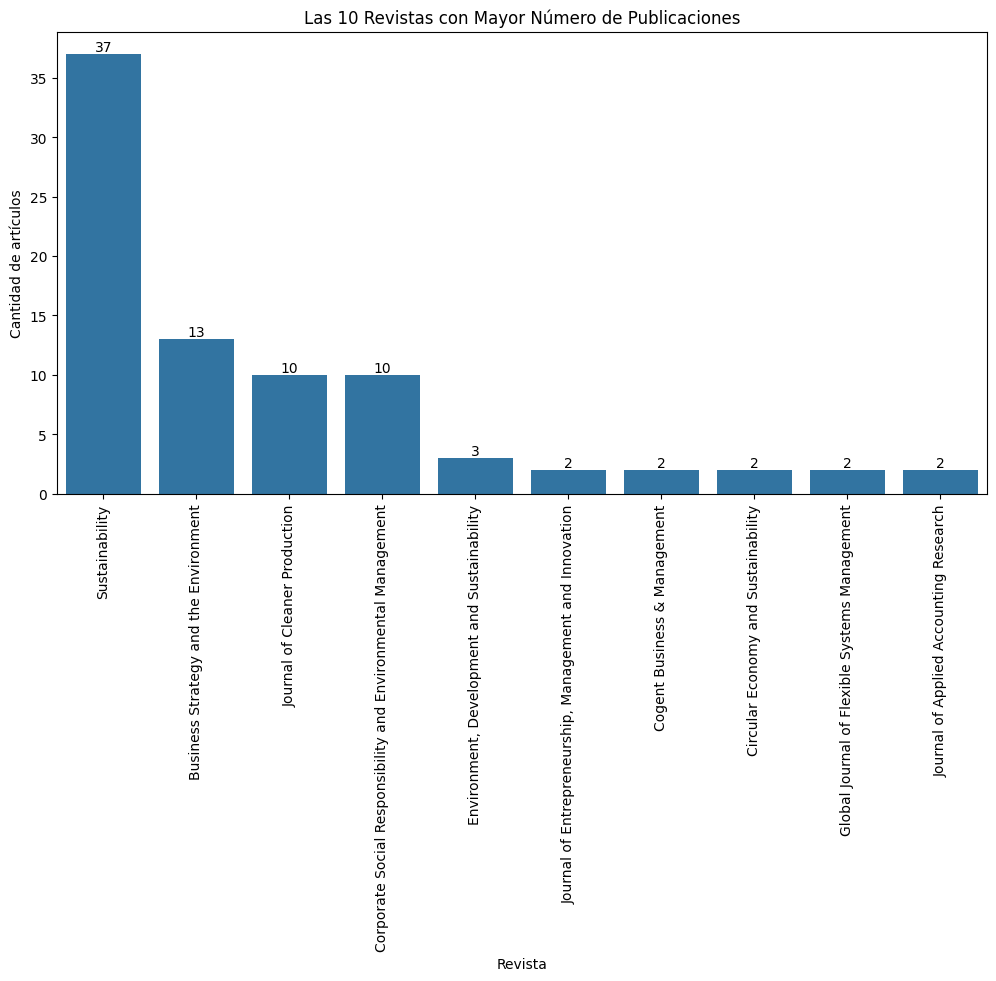

In [81]:
# 1) Obtener top 10 de revistas por número de publicaciones
top_journals = df["Journal"].value_counts().nlargest(10)

# 2) Graficar
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=top_journals.index,
    y=top_journals.values
)
plt.xticks(rotation=90)
plt.xlabel("Revista")
plt.ylabel("Cantidad de artículos")
plt.title("Las 10 Revistas con Mayor Número de Publicaciones")

# 3) Anotar valores
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.show()

1. **Sustainability** aparece con **11 publicaciones**, liderando con claridad el campo.  
2. **Business Strategy and the Environment** ocupa el segundo lugar con **3 artículos**, seguido por varias revistas con 2 publicaciones:  
   - Cogent Business & Management  
   - Journal of Cleaner Production  
   - Corporate Social Responsibility and Environmental Management  
   - Cleaner and Responsible Consumption  
3. El resto del top 10 está compuesto por revistas con 1 artículo cada una, lo cual indica dispersión más allá del núcleo principal.

**Implicaciones:**

- **Canal principal**: Sustainability actúa como el foro de publicación dominante para investigaciones sobre sostenibilidad y PYMES.  
- **Especialización temática**: Las revistas del segundo grupo (Journal of Cleaner Production, CSR & Environmental Management, etc.) sugieren énfasis en aspectos medioambientales y de responsabilidad social.  
- **Diversidad de canales**: Aunque existe un líder claro, hay un espectro amplio de revistas de nicho—esto refleja tanto la interdisciplinariedad del tema como la necesidad de difundir hallazgos en foros especializados.  


### **3.4.2 Palabras Clave más Frecuentes**

El análisis de palabras clave (“Keywords”) permite revelar los temas de investigación más abordados en el corpus, así como su grado de convergencia y diversidad temática.


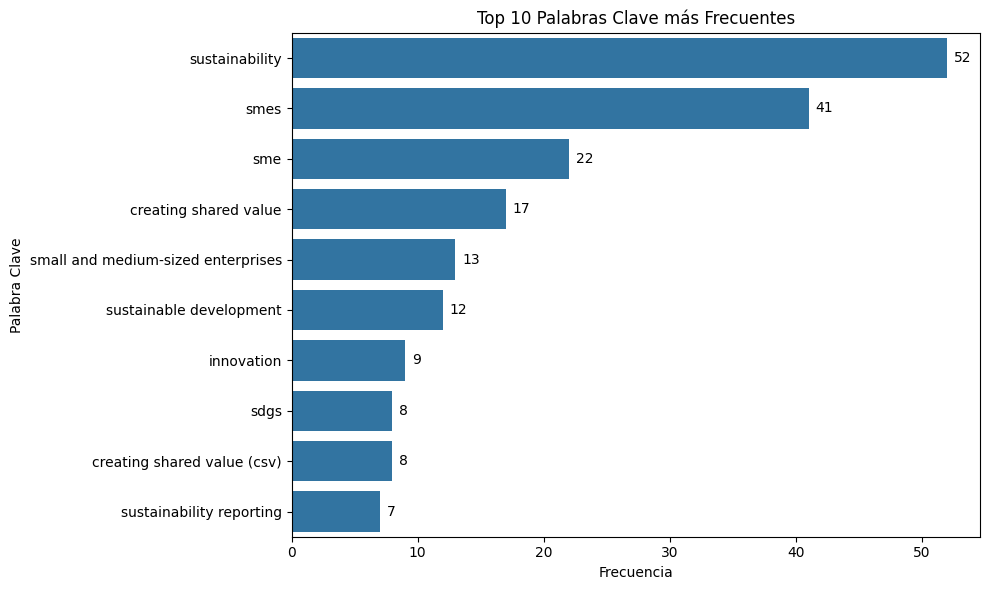

In [82]:
# 1) Separación y normalización de keywords
def split_keywords(field):
    # Usamos ';', ',', '|' como delimitadores
    parts = re.split(r';|,|\|', str(field))
    return [p.strip().lower() for p in parts if p.strip()]

# Aplicar y explotar la lista
df['keywordListRaw'] = df['Keywords'].apply(split_keywords)
all_keywords = df['keywordListRaw'].explode()

# 2) Contar frecuencias
keyword_counts = all_keywords.value_counts()
top_keywords = keyword_counts.head(10).reset_index()
top_keywords.columns = ['Palabra Clave', 'Frecuencia']

# 3) Graficar
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_keywords,
    x='Frecuencia',
    y='Palabra Clave',
    orient='h'
)
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_width())}',
        (p.get_width(), p.get_y() + p.get_height()/2),
        ha='left',
        va='center',
        xytext=(5, 0),
        textcoords='offset points'
    )

plt.title("Top 10 Palabras Clave más Frecuentes")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra Clave")
plt.tight_layout()
plt.show()

#### Interpretación de las Palabras Clave

- **Temas dominantes**: Las palabras clave más frecuentes (p. ej. “sustainability”, “small and medium enterprises”, “value creation”, etc.) reflejan el núcleo conceptual del estudio, centrado en prácticas sostenibles en PYMES y creación de valor compartido.
- **Diversidad temática**: Aunque existe un pequeño conjunto de términos muy recurrentes, el “long tail” de keywords (más de 150 términos únicos) indica una amplia variedad de enfoques y subtemas, desde métodos específicos (“case study”, “survey”) hasta dimensiones geográficas (“emerging economies”).
- **Agrupamiento futuro**: Para un análisis temático avanzado, conviene agrupar sinónimos y variantes (p. ej. “sme” vs. “small and medium enterprises”), y aplicar técnicas de reducción de dimensionalidad o clustering (p. ej. LDA, k‑means sobre TF-IDF) para descubrir tópicos emergentes.
- **Correlación con revistas y años**: Se recomienda cruzar la frecuencia de keywords con el año de publicación y la revista para detectar la evolución de temas (p. ej. qué keywords emergen a partir de 2020) y la especialización de cada canal de difusión.

En la siguiente sección implementaremos un análisis de tópicos basado en LDA para mapear la evolución temática a lo largo del tiempo.


# **Análisis de colaboración: Número de autores por artículo**

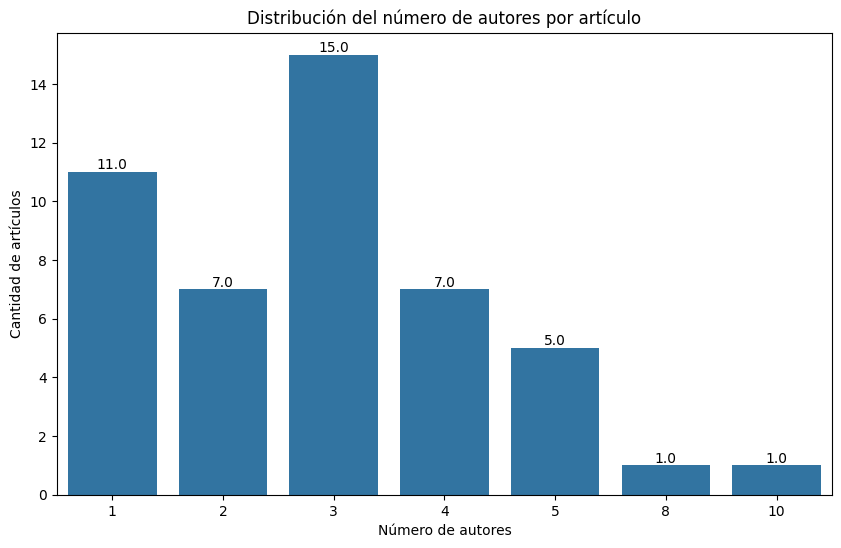

In [ ]:
# Contar el número de autores por artículo
# Manejar posibles valores NaN o vacíos en la columna 'Autores'
df['Num_Authors'] = df['Author(s)'].str.split(';').str.len().fillna(0)

# Convertir la columna a tipo entero para la visualización
df['Num_Authors'] = df['Num_Authors'].astype(int)

# Visualizar la distribución del número de autores por artículo
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Num_Authors', order=sorted(df['Num_Authors'].unique()))

# Agregar los valores a las barras (similar al gráfico anterior)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Número de autores")
plt.ylabel("Cantidad de artículos")
plt.title("Distribución del número de autores por artículo")
plt.show()

# **Mapa de calor de frecuencia de palabras clave a lo largo del tiempo**

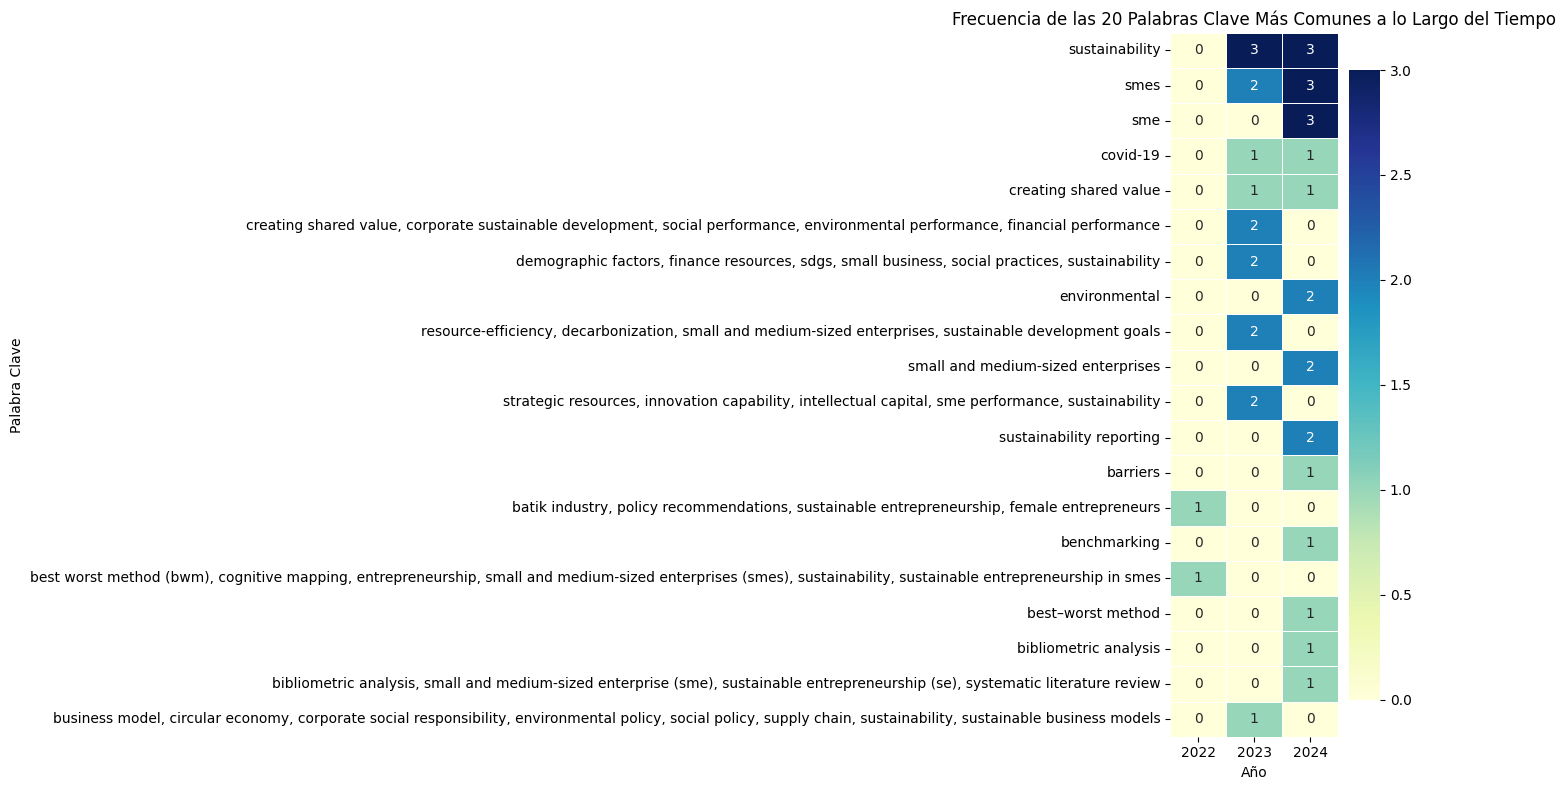

In [ ]:
df['Keywords_cleaned'] = df['Keywords'].dropna().apply(lambda x: [kw.strip().lower() for kw in x.split(';') if kw.strip()])

keyword_year_list = []
for index, row in df.iterrows():
    year = row['Year']
    keywords = row['Keywords_cleaned']
    if isinstance(keywords, list):
        for keyword in keywords:
            keyword_year_list.append((year, keyword))


keyword_year_df = pd.DataFrame(keyword_year_list, columns=['Year', 'Keyword'])


keyword_year_counts = keyword_year_df.groupby(['Year', 'Keyword']).size().reset_index(name='Frequency')


total_keyword_counts = keyword_year_counts.groupby('Keyword')['Frequency'].sum().reset_index()


N = 20
top_keywords = total_keyword_counts.nlargest(N, 'Frequency')['Keyword'].tolist()


heatmap_data = keyword_year_counts[keyword_year_counts['Keyword'].isin(top_keywords)]


heatmap_pivot = heatmap_data.pivot_table(index='Keyword', columns='Year', values='Frequency', fill_value=0)


heatmap_pivot = heatmap_pivot.loc[top_keywords]



plt.figure(figsize=(14, 8))

sns.heatmap(heatmap_pivot, annot=True, fmt='g', cmap='YlGnBu', linewidths=.5)

plt.title(f'Frecuencia de las {N} Palabras Clave Más Comunes a lo Largo del Tiempo')
plt.xlabel("Año")
plt.ylabel("Palabra Clave")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

El mapa de calor presentado, muestra las 20 palabras clave más comunes en investigaciones de sostenibilidad entre 2022 y 2024. La intensidad del color refleja la frecuencia de cada término en distintos años, lo que evidencia tendencias en la evolución de la investigación. Se observa una transición de conceptos generales, como sustainability y SMEs, hacia términos más específicos como decarbonization y resource efficiency, indicando un enfoque progresivo en la gestión sostenible. Además, la interconexión de palabras clave sugiere una integración de modelos económicos y ambientales en la sostenibilidad empresarial. Esto revela un cambio en la comunidad académica hacia análisis más detallados y aplicados en la toma de decisiones.
